In [ ]:
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install numpy
!pip install matplotlib


In [ ]:
!unzip /content/drive/MyDrive/dataset.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

data_dir = '/content/Test/freshapples'

IMG_WIDTH = 128
IMG_HEIGHT = 128

BATCH_SIZE = 50

EPOCHS = 10

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

if os.path.isdir(os.path.join(data_dir, 'Train')):
    train_datagen = datagen.flow_from_directory(
        os.path.join(data_dir, 'Train'),
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

    validation_datagen = datagen.flow_from_directory(
        os.path.join(data_dir, 'Test'),
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary' )
else:
    train_fresh_dir = os.path.join(data_dir, 'Fresh')
    train_rotten_dir = os.path.join(data_dir, 'Rotten')

    train_fresh_datagen = datagen.flow_from_directory(
        train_fresh_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode=None
    )

    train_rotten_datagen = datagen.flow_from_directory(
        train_rotten_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode=None
    )

    train_datagen = zip(train_fresh_datagen, train_rotten_datagen)

    validation_fresh_dir = os.path.join(data_dir, 'Fresh')
    validation_rotten_dir = os.path.join(data_dir, 'Rotten')

    validation_fresh_datagen = datagen.flow_from_directory(
        validation_fresh_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode=None
    )

    validation_rotten_datagen = datagen.flow_from_directory(
        validation_rotten_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode=None
    )

    validation_datagen = zip(validation_fresh_datagen, validation_rotten_datagen)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_datagen,
    epochs=EPOCHS,
    validation_data=validation_datagen
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


image 1/1 /content/1.jpg: 640x416 1 retail, 46.3ms
Speed: 2.2ms preprocess, 46.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


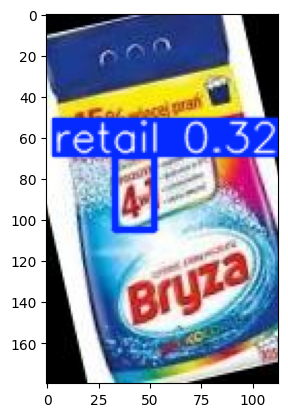

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("best.pt")

# Load the image
image = "1.jpg"  # Or provide an image path or URL

# Make predictions
results = model(image)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

